<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Path_With_Minimum_Effort_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Path With Minimum Effort

You are a hiker preparing for an upcoming hike. You are given heights, a 2D array of size rows x columns, where heights[row][col] represents the height of cell (row, col). You are situated in the top-left cell, (0, 0), and you hope to travel to the bottom-right cell, (rows-1, columns-1) (i.e., 0-indexed). You can move up, down, left, or right, and you wish to find a route that requires the minimum effort.

A route's effort is the maximum absolute difference in heights between two consecutive cells of the route.

Return the minimum effort required to travel from the top-left cell to the bottom-right cell.

 

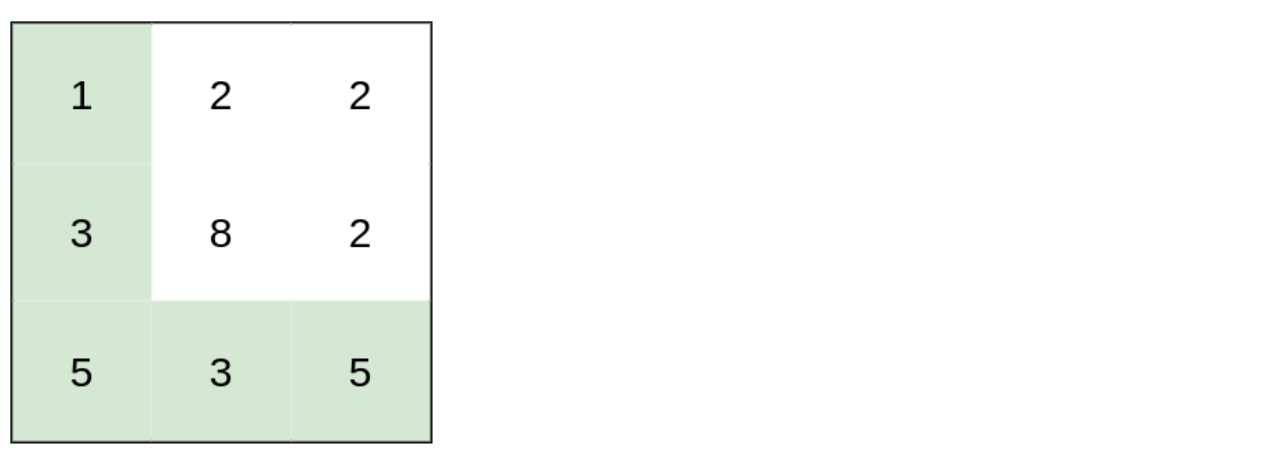

Example 1:

```
Input: heights = [[1,2,2],[3,8,2],[5,3,5]]
Output: 2
Explanation: The route of [1,3,5,3,5] has a maximum absolute difference of 2 in consecutive cells.
This is better than the route of [1,2,2,2,5], where the maximum absolute difference is 3.
```



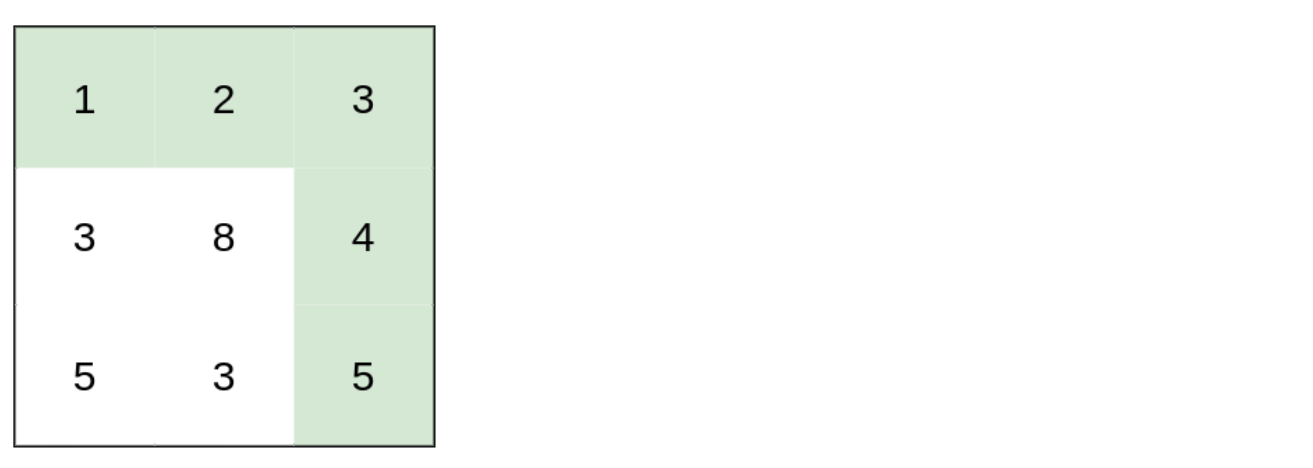

Example 2:

```
Input: heights = [[1,2,3],[3,8,4],[5,3,5]]
Output: 1
Explanation: The route of [1,2,3,4,5] has a maximum absolute difference of 1 in consecutive cells, which is better than route [1,3,5,3,5].
```



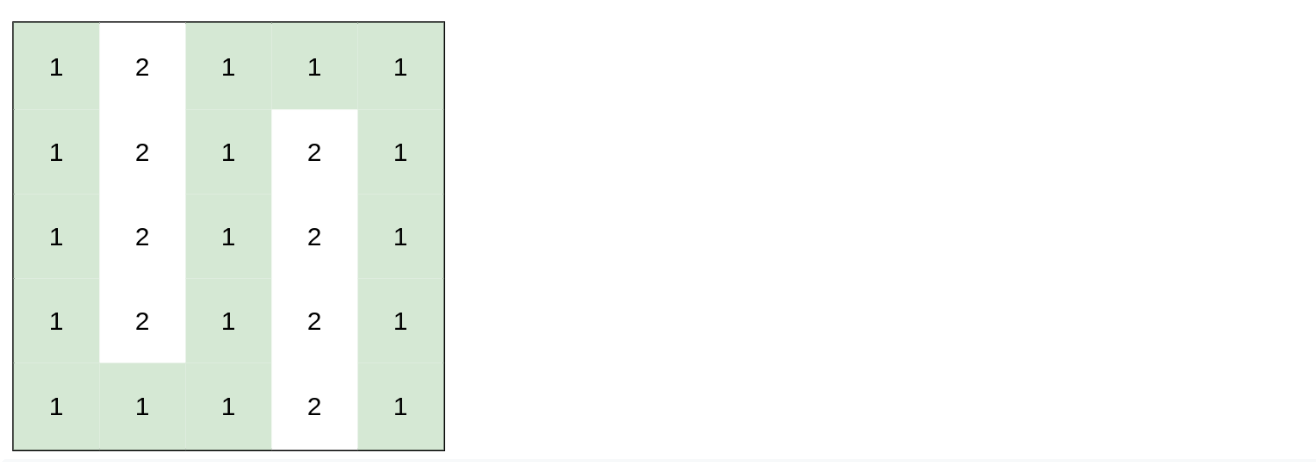

Example 3:

```
Input: heights = [[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]]
Output: 0
Explanation: This route does not require any effort.
```



Constraints:

```
rows == heights.length
columns == heights[i].length
1 <= rows, columns <= 100
1 <= heights[i][j] <= 106
```



# Suoltion 1 : Dijkstra

- searching using priority queue (search min effort first)

In [1]:
import heapq

class Solution:
    def minimumEffortPath(self, heights):
        row = len(heights)
        col = len(heights[0])
        difference_matrix = [[float('inf')]*col for _ in range(row)]
        difference_matrix[0][0] = 0
        visited = [[False]*col for _ in range(row)]
        queue = [(0, 0, 0)]  # difference, x, y
        while queue:
            difference, x, y = heapq.heappop(queue)
            visited[x][y] = True
            for dx, dy in [[0, 1], [1, 0], [0, -1], [-1, 0]]:
                adjacent_x = x + dx
                adjacent_y = y + dy
                if 0 <= adjacent_x < row and 0 <= adjacent_y < col and not visited[adjacent_x][adjacent_y]:
                    current_difference = abs(heights[adjacent_x][adjacent_y]-heights[x][y])
                    max_difference = max(current_difference, difference_matrix[x][y])
                    if difference_matrix[adjacent_x][adjacent_y] > max_difference:
                        difference_matrix[adjacent_x][adjacent_y] = max_difference
                        heapq.heappush(queue, (max_difference, adjacent_x, adjacent_y))
        return difference_matrix[-1][-1]

In [2]:
heights = [[1,2,2],[3,8,2],[5,3,5]]
expected = 2

output = Solution().minimumEffortPath(heights)
print(output)
assert output == expected

2


In [3]:
heights = [[1,2,3],[3,8,4],[5,3,5]]
expected = 1

output = Solution().minimumEffortPath(heights)
print(output)
assert output == expected

1


In [4]:
heights = [[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]]
expected = 0

output = Solution().minimumEffortPath(heights)
print(output)
assert output == expected

0
